In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandasql as ps
import seaborn as sns

In [2]:
join_kr = pd.read_excel('C:\\GitHub\\sdii_datasci\\sdii-datasci\\join.xlsx')
join_kr.columns

Index(['경매번호', '경매종류', '참여순서', '투자자ID', '투자일시', '투자금액금액', '투자성사여부', '입찰이자율',
       '오토비딩', '미투비딩갑', '미투비딩을'],
      dtype='object')

In [3]:
kr_col = pd.DataFrame(join_kr.columns.values)
kr_col

,0
0,경매번호
1,경매종류
2,참여순서
3,투자자ID
4,투자일시
5,투자금액금액
6,투자성사여부
7,입찰이자율
8,오토비딩
9,미투비딩갑


In [4]:
join_new = join_kr
join_new.columns = ['a_id', 'a_cat', 'order_bid', 'l_id', 'date_bid', 'amnt_bid', 'fundingsuccess', 'rate_bid', 'autobid', 'metoo_a', 'metoo_b']
join_new.columns.values

array(['a_id', 'a_cat', 'order_bid', 'l_id', 'date_bid', 'amnt_bid',
       'fundingsuccess', 'rate_bid', 'autobid', 'metoo_a', 'metoo_b'],
      dtype=object)

In [5]:
en_col = pd.DataFrame(join_new.columns.values)
en_col

,0
0,a_id
1,a_cat
2,order_bid
3,l_id
4,date_bid
5,amnt_bid
6,fundingsuccess
7,rate_bid
8,autobid
9,metoo_a


In [7]:
pd.concat([kr_col, en_col], axis = 1)

,0,0
0,경매번호,a_id
1,경매종류,a_cat
2,참여순서,order_bid
3,투자자ID,l_id
4,투자일시,date_bid
5,투자금액금액,amnt_bid
6,투자성사여부,fundingsuccess
7,입찰이자율,rate_bid
8,오토비딩,autobid
9,미투비딩갑,metoo_a


In [8]:
 join_new.head()

,a_id,a_cat,order_bid,l_id,date_bid,amnt_bid,fundingsuccess,rate_bid,autobid,metoo_a,metoo_b
0,A8C32F3,개인,1,UAEB30A,2007-05-29 08:53:31,20000,0,13.0,0,0,0
1,A8C32F3,개인,2,U886072,2007-05-28 14:10:45,20000,0,20.0,0,0,0
2,A8C32F3,개인,3,U8A803C,2007-05-28 14:09:18,20000,0,15.0,0,0,0
3,A8C32F3,개인,4,U886072,2007-05-28 14:04:55,20000,0,20.0,0,0,0
4,AAD65CE,개인,1,U4E8DF4,2007-06-01 11:26:25,20000,0,7.0,0,0,0


In [9]:
join_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245396 entries, 0 to 245395
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   a_id            245396 non-null  object        
 1   a_cat           245396 non-null  object        
 2   order_bid       245396 non-null  int64         
 3   l_id            245396 non-null  object        
 4   date_bid        245396 non-null  datetime64[ns]
 5   amnt_bid        245396 non-null  int64         
 6   fundingsuccess  245396 non-null  int64         
 7   rate_bid        245396 non-null  float64       
 8   autobid         245396 non-null  int64         
 9   metoo_a         245396 non-null  int64         
 10  metoo_b         245396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 20.6+ MB


In [12]:
filepath ='C:\\GitHub\\sdii_datasci\\sdii-datasci\\'
p2p_refund_kr = pd.read_excel(filepath + 'p2p_refund.xlsx') ## check if utf-8 encoded xlsx
p2p_refund_kr.columns

Index(['경매번호', '회차', '기일', '원금', '이자', '잔액', '입금일', '입금원금', '입금이자', '입금후잔액'], dtype='object')

In [23]:
p2p_kr = pd.read_excel(filepath + 'p2p.xlsx')
p2p_kr.columns

Index(['경매번호', '자금모집시작일', '자금모집종료일', '대출자ID', '대출신청금액', '상환기간', '대출자 제시 연 이자율',
       '매칭방식', '대출용도', '투자모집 금액', '투자모집 성공여부', '투자참여인원수', '투자모집(오토비드)',
       '투자모집(미투비드)', '최종약정이자율', '신용보고서', '소득보고서', '핸드폰번호', '집전화번호', '회사전화번호',
       '개인정보서류', '월소득(만원)', '월지출(만원)', '상환후여유자금(만원)', '성별', '나이', '사연길이',
       '추가글 개수', '월지출 상세내역', '주거형태', '거주지역', '직종', '직장세부', '혼인상태', '동거인수',
       '주거지명의', '차량소유', '개인회생', 'Q&A수 게시물 수'],
      dtype='object')

In [24]:
p2p_new.columns = ['a_id', 'date_started', 'date_ended', 'b_id', 'amnt_target',
       'pymnt_period', 'rate_asking', 'matching_cat', 'loanpurpose_cat',
       'amnt_funded', 'fundsuccess', 'num_lender', 'amnt_autobid',
       'amnt_metoo', 'rate_contract', 'cert_credit', 'cert_income', 'm_num',
       'h_num', 'w_num', 'cert_profile', 'income_m', 'expense_m',
       'extra_after_pymnt', 'gender', 'age', 'length_txt', 'num_addtxt',
       'expense_desc', 'h_status', 'region', 'e_status', 'e_desc', 'm_status',
       'num_cohab', 'h_ownership', 'v_ownership', 'delinq', 'num_qna']
p2p_new.columns.values

array(['a_id', 'date_started', 'date_ended', 'b_id', 'amnt_target',
       'pymnt_period', 'rate_asking', 'matching_cat', 'loanpurpose_cat',
       'amnt_funded', 'fundsuccess', 'num_lender', 'amnt_autobid',
       'amnt_metoo', 'rate_contract', 'cert_credit', 'cert_income',
       'm_num', 'h_num', 'w_num', 'cert_profile', 'income_m', 'expense_m',
       'extra_after_pymnt', 'gender', 'age', 'length_txt', 'num_addtxt',
       'expense_desc', 'h_status', 'region', 'e_status', 'e_desc',
       'm_status', 'num_cohab', 'h_ownership', 'v_ownership', 'delinq',
       'num_qna'], dtype=object)

In [25]:
pd.concat([pd.DataFrame(p2p_kr.columns), pd.DataFrame(p2p_new.columns.values)], axis = 1)

,0,0
0,경매번호,a_id
1,자금모집시작일,date_started
2,자금모집종료일,date_ended
3,대출자ID,b_id
4,대출신청금액,amnt_target
5,상환기간,pymnt_period
6,대출자 제시 연 이자율,rate_asking
7,매칭방식,matching_cat
8,대출용도,loanpurpose_cat
9,투자모집 금액,amnt_funded


In [26]:
p2p_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26855 entries, 0 to 26854
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   a_id               26855 non-null  object        
 1   date_started       26855 non-null  datetime64[ns]
 2   date_ended         26855 non-null  datetime64[ns]
 3   b_id               26855 non-null  object        
 4   amnt_target        26855 non-null  int64         
 5   pymnt_period       26855 non-null  int64         
 6   rate_asking        26855 non-null  float64       
 7   matching_cat       26855 non-null  int64         
 8   loanpurpose_cat    14437 non-null  object        
 9   amnt_funded        26855 non-null  float64       
 10  fundsuccess        26855 non-null  int64         
 11  num_lender         26855 non-null  int64         
 12  amnt_autobid       26855 non-null  int64         
 13  amnt_metoo         26855 non-null  int64         
 14  rate_c

In [27]:
p2p_new.head()

,a_id,date_started,date_ended,b_id,amnt_target,pymnt_period,rate_asking,matching_cat,loanpurpose_cat,amnt_funded,...,h_status,region,e_status,e_desc,m_status,num_cohab,h_ownership,v_ownership,delinq,num_qna
0,ADBB538,2007-05-28 05:00:35,2007-06-30 12:00:00,UE799D6,100,3,25.0,1,NaN,0.0,...,NaN,서울 서초구 방배동,일반회사원,NaN,0,0,NaN,0,0,0
1,A6C8F3E,2007-05-28 05:21:12,2007-09-01 12:00:00,UE799D6,100,12,29.0,1,NaN,0.0,...,NaN,서울 서초구 방배동,일반회사원,NaN,0,0,NaN,0,0,0
2,A8C32F3,2007-05-28 05:24:10,2007-09-01 12:00:00,UE799D6,200,12,29.0,1,NaN,0.0,...,NaN,서울 서초구 방배동,일반회사원,NaN,0,0,NaN,0,0,0
3,AAD65CE,2007-05-28 09:44:38,2007-06-01 12:00:00,UB3D977,100,3,7.0,1,NaN,0.0,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0,6
4,A22DEE1,2007-05-28 09:57:30,2007-06-29 12:00:00,UEA8D32,100,3,6.0,1,NaN,0.0,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0,7


In [28]:
user = pd.read_excel(filepath + 'user.xlsx')
user.columns

Index(['투자자ID', '가입일', '페이스북로그인', '성별', '나이', '오토비드사용', '미투비드갑사용', '대부회원 여부'], dtype='object')

In [29]:
p2p_new['a_id'].nunique()

26830

In [30]:
join_new['a_id'].nunique()

3215

In [31]:
len(np.unique(join_new['a_id']))

3215

In [35]:
join_new.size

2699356

In [36]:
ps.sqldf("SELECT COUNT(a_id) AS a_cnt FROM join_new GROUP BY a_id", globals())

,a_cnt
0,1
1,104
2,6
3,45
4,136
...,...
3210,270
3211,58
3212,102
3213,74


In [37]:
ps.sqldf("SELECT a_cat, COUNT(a_id) AS cnt FROM join_new WHERE order_bid == 0 GROUP BY 1;", globals())

,a_cat,cnt


In [39]:
ps.sqldf("SELECT a_cat, COUNT(a_id) AS cnt FROM join_new WHERE order_bid == 1 GROUP BY 1;", globals())

,a_cat,cnt
0,개인,3087
1,기업,128


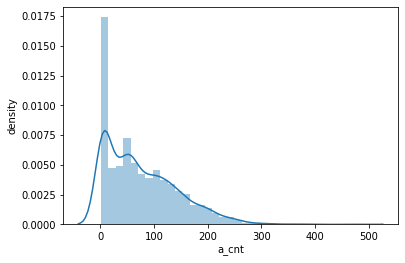

In [41]:
a_cnt = ps.sqldf("SELECT count(a_id) AS a_cnt FROM join_new GROUP BY a_id;", globals())
sns.distplot(a_cnt)
plt.xlabel('a_cnt')
plt.ylabel('density')
plt.show()

In [44]:
p2p_new['a_id'].nunique()

26830

In [45]:
ps.sqldf("SELECT a_id, COUNT(a_id) AS a_cnt FROM p2p_new GROUP BY a_id HAVING a_cnt > 1;", globals())

,a_id,a_cnt
0,A2DE5DD,2
1,A2E7199,2
2,A30C9FA,2
3,A3776E6,2
4,A3C5F10,2
5,A43909E,2
6,A454F74,2
7,A545120,2
8,A5A40E6,2
9,A5F31F5,2


In [46]:
26830+25

26855

In [47]:
25 / 26855

0.000930925339787749

In [48]:
p2p_new.groupby('fundsuccess').size()

fundsuccess
0    24760
1     2095
dtype: int64

In [49]:
2095 + 24760

26855

In [50]:
2095 / 26855

0.07801154347421337

In [51]:
ps.sqldf("SELECT COUNT(a_id) AS a_cnt FROM p2p_new WHERE fundsuccess == 1 GROUP BY a_id;", globals())

,a_cnt
0,1
1,1
2,1
3,1
4,1
...,...
2090,1
2091,1
2092,1
2093,1


In [52]:
len(np.unique(p2p_kr['대출자ID']))

11163

In [54]:
p2p_kr['대출자ID'].nunique()

11163

In [55]:
join_new['l_id'].nunique()

6345

In [56]:
11163 / 6345

1.759338061465721